/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


'R0 is the distance between the box and the goal of the box\n   R1 is the mean distance bewtween box and robot finger tips"\n   R is  reward = 750 * reward_term_1 + 250 * reward_term_2 where \n    reward_term_1 is the delta the fingertips got gloser to the box,\n    and reward_term_2 is the delta of how much th box has gotten closer to the target position \n'

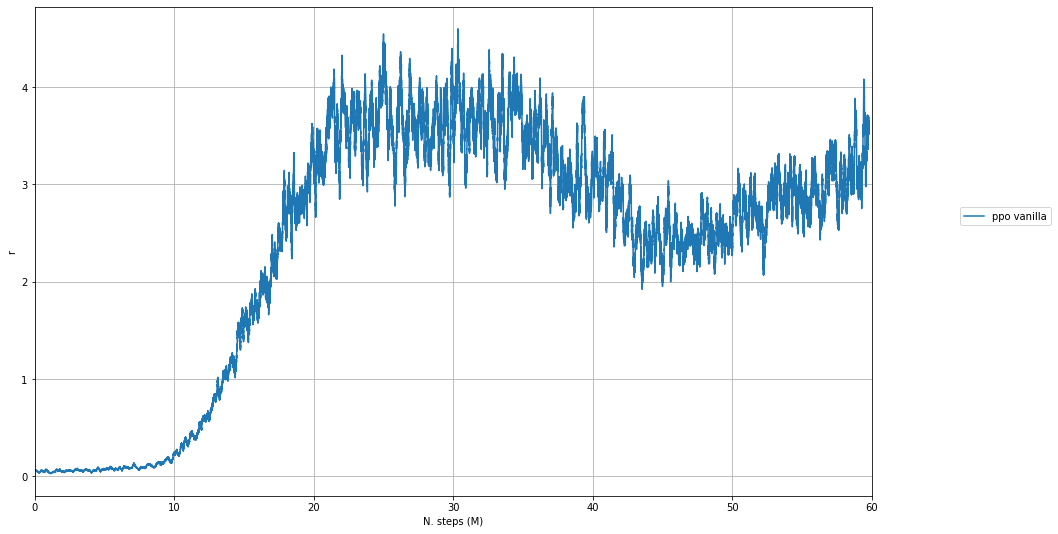

In [16]:
# from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd
from  glob import glob


def get_data(my_dir):
    num_good_traj = 0
    
    exps = glob(my_dir+'*')
    d = exps[0]
    df = load_results(d)
    #df = pd.DataFrame() 

    df['f']= df['l'].cumsum()/1000000

    df['perf']= df['r']
    df['perf'].where(df['perf']>0,0,inplace=True)

    return df


my_dir = '/workspace8/gabriele/RUNS/exp_reacher_ppod_checking_ppo_works'
df = get_data(my_dir)

#df = df[df['goal_or'] != '0']

time_limit = 0
fig = plt.figure(clear=True, figsize=(15,9))

x_max = 60
roll = 1000
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax = plt.subplot(1, 1, 1)
# ax.set_title(' {} total time: {:.1f} h FPS {:.1f}'.format('PPO trifinger',total_time/3600, total_steps/total_time))
# #df[['f','goal']].rolling(roll).mean().plot('f','goal',  ax=ax,label='ppo vanilla')

# ax.set_ylabel('Goal')
# ax.grid(True)
# plt.xlim((0, x_max))

# ax = plt.subplot(3, 2, 2)
# df[['f','perf']].rolling(roll).mean().plot('f','perf',  ax=ax,label='ppo vanilla')
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('perf')
# plt.xlim((0, x_max))
# ax.grid(True)

# ax = plt.subplot(3, 2, 3)
# df[['f','r1']].rolling(roll).mean().plot('f','r1',  ax=ax,label='ppo vanilla')
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('r1')
# plt.xlim((0, x_max))
# ax.grid(True)

# ax = plt.subplot(3, 2, 4)
# df[['f','min_r0']].rolling(roll).min().plot('f','min_r0',  ax=ax,label='ppo vanilla')
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('min_r0')
# plt.xlim((0, x_max))
# ax.grid(True)

ax = plt.subplot(1, 1, 1)
df[['f','r']].rolling(roll).mean().plot('f','r',  ax=ax,label='ppo vanilla')
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('r')
plt.xlim((0, x_max))
ax.grid(True)

# ax = plt.subplot(3, 2, 2)
# df[['f','r0']].rolling(roll).mean().plot('f','r0',  ax=ax,label='ppo vanilla')
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('r0')
# plt.xlim((0, x_max))
# ax.grid(True)

# ax = plt.subplot(3, 2, 6)
# df[['f','new_r']].rolling(roll).mean().plot('f','new_r',  ax=ax,label='ppo vanilla')
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('new_r')
# plt.xlim((0, x_max))
# ax.grid(True)


#ax.legend(loc=4, prop={'size': 10})#
ax.legend(bbox_to_anchor=(1.1, 0.6))



"""R0 is the distance between the box and the goal of the box
   R1 is the mean distance bewtween box and robot finger tips"
   R is  reward = 750 * reward_term_1 + 250 * reward_term_2 where 
    reward_term_1 is the delta the fingertips got gloser to the box,
    and reward_term_2 is the delta of how much th box has gotten closer to the target position 
"""

In [153]:
min(df['min_r0'][df['min_r0'] != 0])

0.006174059368626397

In [154]:
df[df['goal_or'] != '0'][-50:]

,index,r,l,t,r0,r1,goal,goal_coor,goal_or,min_r0,ereward,reward_woD,f,perf
3250,162,13.402442,1250,10708.991984,0.372437,0.271010,0,[0. 0. 0.1],[0 0 0 1],0.320378,13.402442,13.402442,4.06375,13.402442
3251,162,-42.408913,1250,10708.995309,0.486314,0.333551,0,[0. 0. 0.1],[0 0 0 1],0.332656,-42.408913,-42.408913,4.06500,0.000000
3252,162,-0.208029,1250,10708.996964,0.468641,0.154457,0,[0. 0. 0.1],[0 0 0 1],0.325672,-0.208029,-0.208029,4.06625,0.000000
3253,162,-54.572216,1250,10709.004801,0.534144,0.238365,0,[0. 0. 0.1],[0 0 0 1],0.329409,-54.572216,-54.572216,4.06750,0.000000
3254,162,-35.028985,1250,10709.004828,0.530604,0.154942,0,[0. 0. 0.1],[0 0 0 1],0.332567,-35.028985,-35.028985,4.06875,0.000000
3255,162,-33.519487,1250,10709.007093,0.527784,0.165101,0,[0. 0. 0.1],[0 0 0 1],0.315758,-33.519487,-33.519487,4.07000,0.000000
3256,162,-27.100766,1250,10709.007127,0.521234,0.132727,0,[0. 0. 0.1],[0 0 0 1],0.273168,-27.100766,-27.100766,4.07125,0.000000
3257,162,-28.111714,1250,10709.008040,0.526231,0.138488,0,[0. 0. 0.1],[0 0 0 1],0.248714,-28.111714,-28.111714,4.07250,0.000000
3258,162,-42.655520,1250,10709.008775,0.526604,0.210389,0,[0. 0. 0.1],[0 0 0 1],0.318748,-42.655520,-42.655520,4.07375,0.000000
3259,162,-30.139025,1250,10709.010911,0.516211,0.179685,0,[0. 0. 0.1],[0 0 0 1],0.332679,-30.139025,-30.139025,4.07500,0.000000


/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/shared/gabriele/miniconda/envs/animal/lib/python3.6/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


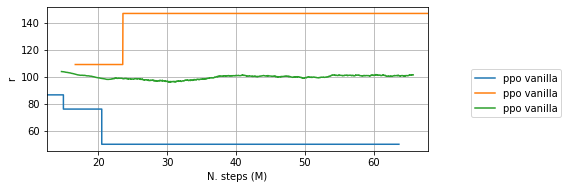

In [223]:
my_dir = '/workspace8/gabriele/RUNS/exp_rrc17'
df = get_data(my_dir)
df = df[df['goal_coor'] == '0']
time_limit = 0
fig = plt.figure(clear=True, figsize=(15,9))

#x_max = 100
roll = 1000
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

# ax = plt.subplot(3, 2, 1)
# ax.set_title(' {} total time: {:.1f} h FPS {:.1f}'.format('PPO trifinger',total_time/3600, total_steps/total_time))
# df[['f','goal']].rolling(roll).mean().plot('f','goal',  ax=ax,label='ppo vanilla')

# ax.set_ylabel('Goal')
# ax.grid(True)
# plt.xlim((0, x_max))

# ax = plt.subplot(3, 2, 2)
# df[['f','perf']].rolling(roll).mean().plot('f','perf',  ax=ax,label='ppo vanilla')
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('perf')
# plt.xlim((0, x_max))
# ax.grid(True)

# ax = plt.subplot(3, 2, 3)
# df[['f','r1']].rolling(roll).mean().plot('f','r1',  ax=ax,label='ppo vanilla')
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('r1')
# plt.xlim((0, x_max))
# ax.grid(True)

# ax = plt.subplot(3, 2, 4)
# df[['f','min_r0']].rolling(roll).mean().plot('f','min_r0',  ax=ax,label='ppo vanilla')
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('min_r0')
# plt.xlim((0, x_max))
# ax.grid(True)

ax = plt.subplot(3, 2, 5)
df[['f','r']].rolling(roll).min().plot('f','r',  ax=ax,label='ppo vanilla')
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('r')
#plt.xlim((0, x_max))
ax.grid(True)

ax = plt.subplot(3, 2, 5)
df[['f','r']].rolling(roll).max().plot('f','r',  ax=ax,label='ppo vanilla')
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('r')
#plt.xlim((0, x_max))
ax.grid(True)

ax = plt.subplot(3, 2, 5)
df[['f','r']].rolling(roll).mean().plot('f','r',  ax=ax,label='ppo vanilla')
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('r')
#plt.xlim((0, x_max))
ax.grid(True)

# ax = plt.subplot(3, 2, 2)
# df[['f','r0']].rolling(roll).mean().plot('f','r0',  ax=ax,label='ppo vanilla')
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('r0')
# plt.xlim((0, x_max))
# ax.grid(True)

# ax = plt.subplot(3, 2, 6)
# df[['f','new_r']].rolling(roll).mean().plot('f','new_r',  ax=ax,label='ppo vanilla')
# ax.set_xlabel('N. steps (M)')
# ax.set_ylabel('new_r')
# plt.xlim((0, x_max))
# ax.grid(True)


#ax.legend(loc=4, prop={'size': 10})#
ax.legend(bbox_to_anchor=(1.1, 0.6))



In [225]:
len(df['r'].unique())

23